In [38]:
### Import all the libraries ###
import requests 
import re
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('omw-1.4')
################################

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...


True

In [39]:
####################################
### Scrapping the wikipedia page ###
####################################


####################################
#### Scrapp the user main page #####
####################################
def UserPage(name):
    #URL de la page wikipedia
    url = 'https://fr.wikipedia.org/wiki/Utilisateur:'+name
    #requête pour obtenir le code HTML
    page = requests.get(url)
    #créer l'objet Beautiful Soup
    soup = BeautifulSoup(page.text, 'html.parser')
    #trouver le contenu de la page
    content = soup.find(id="mw-content-text")
    #extraire le texte
    textUserPage = content.get_text()
    #retourne le texte
    return(textUserPage)
##################################


##### Scrapp the user discussion page #####
def UserDiscussion(name):
    #URL de la page wikipedia
    url = 'https://fr.wikipedia.org/wiki/Discussion_utilisateur:'+name
    #requête pour obtenir le code HTML
    page = requests.get(url)
    #créer l'objet Beautiful Soup
    soup = BeautifulSoup(page.text, 'html.parser')
    #trouver le contenu de la page
    content = soup.find(id="mw-content-text")
    #extraire le texte
    textUserDiscussion = content.get_text()
    #retourne le texte
    return(textUserDiscussion)
########################################

In [40]:
###Clean the text data###

##### Fusion all the pages #####
def fusionner_texte(texte1,texte2):
    return texte1 + texte2
#################################

#####Remove the unusefull data from the text, mainly the () and []#####
def clean_text(text):
    text = re.sub(r'\(.*?\)', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\b(\w*wiki\w*)\b', '', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(\w*accueil\w*)\b', '', text, flags=re.IGNORECASE)
    return re.sub(r'\[.*?\]', '', text)
#################################

In [41]:
###Get the stopwords to delete the useless words###
nltk.download('stopwords')
french_stopwords = set(stopwords.words("french"))
english_stopwords = set(stopwords.words("english"))
stopwords = french_stopwords | english_stopwords
###################################################

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nelso\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
### Using the tf_idf function to get the most used words with the stopswords deleted from it ###
def tf_idf(text):
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords)
    tfidf_matrix = tfidf_vectorizer.fit_transform([text])
    feature_names = tfidf_vectorizer.get_feature_names()
    dense = tfidf_matrix.todense()
    denselist = dense.tolist()
    df = pd.DataFrame(denselist, columns=feature_names)
    return df
############################################################

In [43]:
### Call all the function and ask wich user whe should check ###
if __name__ == "__main__":
    name = input("Entrez le nom de la page wikipedia: ")
    textemerged = fusionner_texte(UserPage(name),UserDiscussion(name))
    texteclean = clean_text(textemerged)
    tfidf = tf_idf(texteclean)
    print(tfidf)
################################################################

Entrez le nom de la page wikipedia: Eric
   affichés      afin      aide  allemand     allez    ancien   anglais  \
0  0.043274  0.043274  0.173097  0.043274  0.043274  0.043274  0.043274   

   anglaise  annonces   appelle  ...     vivre     voilà       vue  \
0  0.043274  0.043274  0.043274  ...  0.043274  0.043274  0.043274   

   vérifiabilité    woohoo  échapper  éditorial  également   éréales  \
0       0.043274  0.043274  0.043274   0.043274   0.043274  0.086548   

   événements  
0    0.043274  

[1 rows x 232 columns]


C:\Users\nelso\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


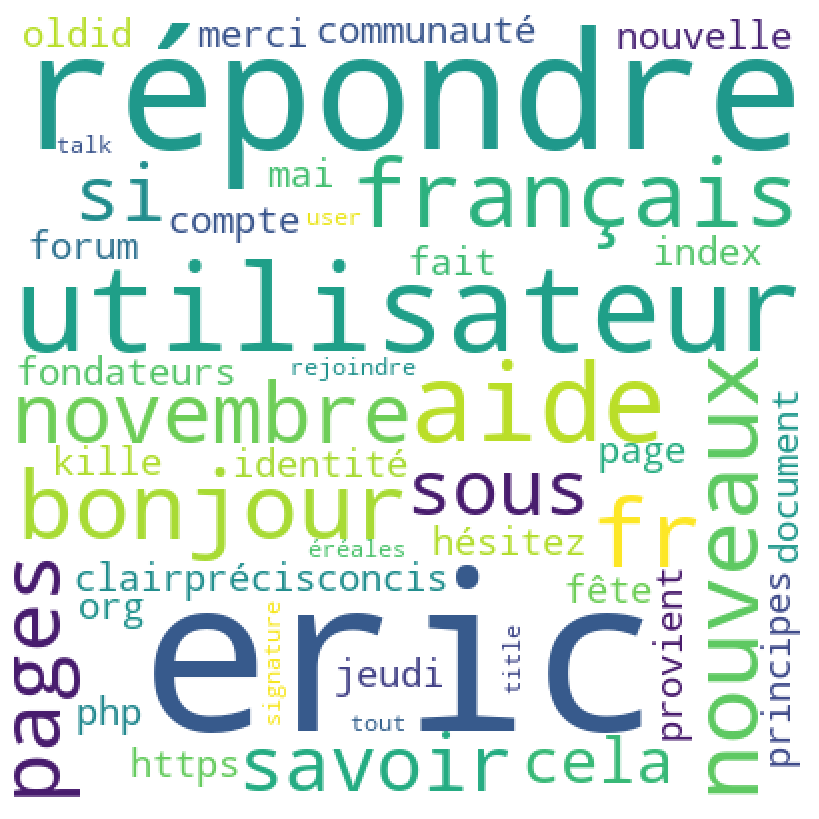

In [44]:
# Transformer la dataframe en un dictionnaire pour stocker les termes et leurs occurrences
dictionnaire = {k: v[0] for k, v in tfidf.to_dict().items()}

# Créer un nuage de mots
wordcloud = WordCloud(width = 400, height = 400, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(dictionnaire)

# Afficher le nuage de mots
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [45]:
print(dictionnaire)

{'affichés': 0.04327423224079154, 'afin': 0.04327423224079154, 'aide': 0.17309692896316617, 'allemand': 0.04327423224079154, 'allez': 0.04327423224079154, 'ancien': 0.04327423224079154, 'anglais': 0.04327423224079154, 'anglaise': 0.04327423224079154, 'annonces': 0.04327423224079154, 'appelle': 0.04327423224079154, 'articles': 0.04327423224079154, 'attention': 0.04327423224079154, 'auf': 0.04327423224079154, 'aujourd': 0.04327423224079154, 'aussi': 0.04327423224079154, 'auteurs': 0.04327423224079154, 'avancées': 0.04327423224079154, 'aventure': 0.04327423224079154, 'babel': 0.04327423224079154, 'bas': 0.04327423224079154, 'beherrscht': 0.04327423224079154, 'benutzer': 0.04327423224079154, 'besoin': 0.04327423224079154, 'bientôt': 0.04327423224079154, 'bienvenue': 0.04327423224079154, 'bonjour': 0.12982269672237462, 'bonne': 0.04327423224079154, 'boîtes': 0.04327423224079154, 'bref': 0.04327423224079154, 'brouillon': 0.04327423224079154, 'básico': 0.04327423224079154, 'bénévole': 0.04327

In [46]:
# Fonction pour trouver les synonymes d'un mot
def find_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return set(synonyms)


for word, value in dictionnaire.items():
    print(f"Word: {word} , Value: {value} , Synonyms: {find_synonyms(word)}")

Word: affichés , Value: 0.04327423224079154 , Synonyms: set()
Word: afin , Value: 0.04327423224079154 , Synonyms: set()
Word: aide , Value: 0.17309692896316617 , Synonyms: {'aide-de-camp', 'aide', 'auxiliary', 'adjutant'}
Word: allemand , Value: 0.04327423224079154 , Synonyms: set()
Word: allez , Value: 0.04327423224079154 , Synonyms: set()
Word: ancien , Value: 0.04327423224079154 , Synonyms: set()
Word: anglais , Value: 0.04327423224079154 , Synonyms: set()
Word: anglaise , Value: 0.04327423224079154 , Synonyms: set()
Word: annonces , Value: 0.04327423224079154 , Synonyms: set()
Word: appelle , Value: 0.04327423224079154 , Synonyms: set()
Word: articles , Value: 0.04327423224079154 , Synonyms: {'article', 'clause'}
Word: attention , Value: 0.04327423224079154 , Synonyms: {'attending', 'aid', 'tending', 'care', 'attention'}
Word: auf , Value: 0.04327423224079154 , Synonyms: set()
Word: aujourd , Value: 0.04327423224079154 , Synonyms: set()
Word: aussi , Value: 0.04327423224079154 , Sy